# Notebook 1_7

## Transfer Function and Scipy Plot

#### Student Learning Outcomes
* Learn the concept of Transfer Function
* Learn to input Transfer Function using Python Scipy.
* Learn to plot system response using Python Scipy.

--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt


In general, a system in Time domain has,

* Input $x(t)$
* Output $y(t)$
* System model: diff equation, such as form like $\frac{dy(t)}{dt}+3y(t)=x(t)$ 

Equivalently, a system in Laplace domain has,
* Input $X(s)$
* Output $Y(s)$
* System model: Laplace Transformed equation, such as form like $sY(s)+3Y(s)=X(s)$ 

-------

In Laplace domain, engineers typically don't write a model in a such equation form -- $sY(s)+3Y(s)=X(s)$ 

To provide a clearer representation, especially highlighting the input-output relationship, engineers will re-arrange the transformed equation, re-write in such fraction form:

$$\frac{Y(s)}{X(s)}=\frac{1}{s+3}$$

Such form is called **Transfer Function**.

--------
Formally, the **Transfer Function** of a system is defined as:

$$H(s) = \frac{Y(s)}{X(s)}$$

* $H(s)$ is a commonly used notation for Transfer Function
* $ X(s) $ is the **Laplace transform** of the system input $ x(t) $,
* $ Y(s) $ is the **Laplace transform** of the system output $ y(t) $.
* The system assumes **Zero initial condition**

We always make **the coefficient of the highest-degree term in the denominator to 1.** This ensures a consistency and standard form when analyzing systems.

For example, 

* **first-order transfer function** should be written as:
$\frac{1}{s+3}$, Not $\frac{3}{3s+9}$ or $\frac{\frac{1}{3}}{\frac{s}{3}+1}$.
* **second-order transfer function** should be written as:
 $\frac{5}{s^2 + 4s + 6}$, Not $\frac{10}{2s^2 + 8s + 12}$ or $\frac{\frac{5}{2}}{\frac{s^2}{2} + 2s + 3}$

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Transfer Function</h2>
</div>

**Example 1**

Recall the Notebook 1_3, we have this diff equation that describes the pool ball's motion:

 $$ m \cdot \frac{dv(t)}{dt} + b \cdot v(t) = F_\text{hit}(t) $$

Apply Laplace Transform to this diff equation:
 $$ msV(s) + bV(s) = F_{\mathrm{hit}}(s) $$

Re-arrange the equation into a Transform Function form, with ball velocity $V(s)$ as output, hit force $F_{hit}(s)$ as input.

 $$H(s)=\frac{V(s)}{F_{hit}(s)} = \frac{1}{ms+b} = \frac{1/m}{s+b/m} $$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Result: 1 pt</strong>
</span>

------
**Example 2**

Recall the Notebook 1_4, we have this diff equation that describes the heating of car inside:

 $$C\frac{dT(t)}{dt}+GT(t)=\dot Q(t)$$

Apply Laplace Transform to this diff equation:
 $$ CsT(s) + GT(s) = \dot Q(s) $$

Re-arrange the equation into a Transform Function form, with temperature difference $T(s)$ as output, heater power $\dot Q(s)$ as input.

 $$H(s)=\frac{T(s)}{\dot Q(s)} = \frac{1}{Cs+G} = \frac{1/C}{s+G/C} $$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Result: 1 pt</strong>
</span>

In summary, you should notice that a **Transfer Function** only contains parameters related to the **system model**, not the **input**.  

* Example 1, mass $m$ and friction coeffient $b$ are only related with system model.
* Example 2, thermal capacitance $C$ and thermal conductance $G$ are only related with system model.

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Use Transfer Function to Plot in Python</h2>
</div>


In previous classes, we always need to get the time domain output $y(t)$ expression, then plot in Python.

Now, if we already have a **Transfer Function** of a system, we can use some built-in Python functions to plot commonly response.

The Python package to use is ```scipy.signal```

In [2]:
## Run this code to import
import scipy.signal as sig

Specifically, we use these:

* ```scipy.signal.lti``` : this creates a Transfer Function object.
* ```scipy.signal.impulse```: this generates a unit impulse response (the output when input is unit impulse)
* ```scipy.signal.step```: the generates a unit step response (the output when input is unit step)

**Example 1**

Revisit the pool ball hitting problem

* You got its transfer function in Task 1
* The input is a impulse signal. The impulse is $0.5\delta(t) $

Let's use Python ```scipy.signal.lti``` and ```scipy.signal.impulse``` to plot its output.

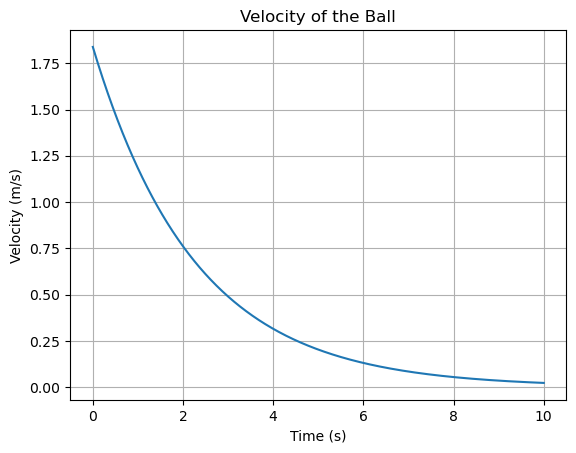

In [3]:
b = 0.12
m = 0.272

# check the official doc of scipy.signal.lti to fill it
num1 = [ 1/m ]
den1 = [ 1, b/m ]
H_s1 = sig.lti(num1, den1)

# create time array for 10 seconds
t1 = np.linspace(0, 10, 1000)

# sig.impulse has 2 output, first output t can be discard
_, v_t = sig.impulse(H_s1, T=t1)

## Scale the unit impulse to 0.5delta(t)
v_t = 0.5*v_t
plt.plot(t1, v_t)

# Others
plt.title("Velocity of the Ball")  
plt.xlabel("Time (s)")  
plt.ylabel("Velocity (m/s)")  
plt.grid(True)

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Fill Code and generate graph: 1.5 pt</strong>
</span>

**Example 2**

Revisit the heating of car inside problem

* You got its transfer function in Task 1
* The input is a step signal. The step is $6000u(t)$

Let's use Python ```scipy.signal.lti``` and ```scipy.signal.step``` to plot its output.

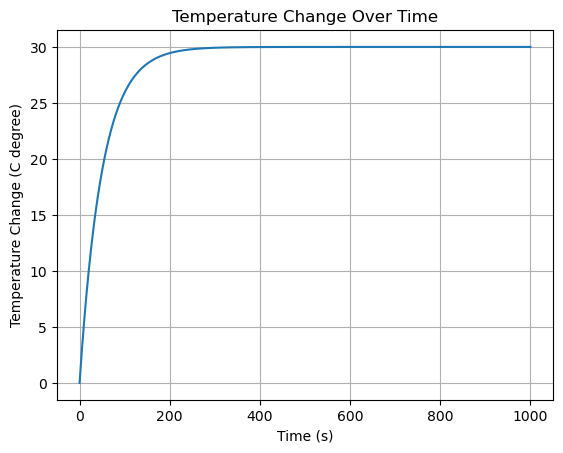

In [4]:
C = 10000
G = 200

# check the official doc of scipy.signal.lti to fill it
num2 = [ 1/C ]
den2 = [ 1, G/C ]
H_s2 = sig.lti(num2, den2)

# create time array for 1000 seconds
t2 = np.linspace(0, 1000, 1000)

# sig.step has 2 output, first output t can be discard
_, Temp_t = sig.step(H_s2, T=t2)

## Scale the unit step u(t) to 6k u(t)
Temp_t = 6000*Temp_t
plt.plot(t2, Temp_t)

# Others
plt.title("Temperature Change Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Change (C degree)")
plt.grid(True)

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Fill Code and generate graph: 1.5 pt</strong>
</span>

**You can verify your generated graphs with previous notebooks. They should look the Same.**

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Advanced Plot</h2>
</div>

If you have 

* Known Transfer Function $H(s) = \frac{Y(s)}{X(s)}$
* Mixed input signal. For example input $x(t) = 5\delta(t)+9u(t)$

If you want to plot the output $y(t)$.

One way is go thru procudures: the Laplace Transform -> Solve for $Y(s)$ -> Inverse Laplace Transform. Such that get $y(t)$, then plot it in Python.

----

An easier way is using the **Principles of Linear Systems**. 

Firstly, if a system has a Laplace Transfer Function, then it must be a linear system.

So it inherently follows the principle of linear systems.

* If $ \text{Input } x_1(t) \to \text{System Model} \to \text{Output }y_1(t)$;
  $ \text{Input } x_2(t) \to \text{System Model} \to \text{Output }y_2(t)$, Then for any constants $a$ and $b$,
  $ \text{Input } ax_1(t)+bx_2(t) \to \text{System Model} \to \text{Output } ay_1(t)+by_2(t)$

In short, this means **Scaling and Addition of inputs result in Same Scaling and Addition of outputs**

--------
Back to our problem: if input is  $x(t) = 5\delta(t)+9u(t)$, we want to plot the output $y(t)$

You can first Python plot unit impulse and unit step separately, and combine them together.

```python
# This is Pseudo-code example
H_s = ...
t = np.linspace(...)

_, y_1_t = sig.impulse(H_s, T=t)
_, y_2_t = sig.step(H_s, T=t)
y_final_t = 5*y_1_t + 9*y_2_t
plt.plot(t, y_final_t)
```

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


